In [2]:
import numpy as np

#np.random.seed(1234)
import time
import os
import pandas as pd
from numpy.linalg import norm
import math

import scanpy as sc
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

from os import path
import random


In [3]:
import nsf_paper
import SpatialDE

In [4]:
#from nsf_paper import utils   
from nsf_paper.utils import preprocess,visualize,misc

2024-10-16 15:41:56.185635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 15:41:57.434611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/mnt/jackywang/nfs_share/anaconda3/envs/biotransfer/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [5]:
from base import MixedGaussian
from plot import plot_clusters

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
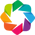

SpatailDM version: 0.1.0


In [6]:
import spatialdm as sdm
from spatialdm.datasets import dataset
import spatialdm.plottings as pl

import matplotlib.pyplot as plt
print("SpatailDM version: %s" %sdm.__version__)

# NPC1-genes

In [7]:
adata_impt_all = sc.read_h5ad('NPC1/patient1_adata_all_pvalue.h5ad')
spatialxy = np.column_stack((np.array(adata_impt_all.obs['x']), np.array(adata_impt_all.obs['y'])))
adata_impt_all.obsm['spatial'] = spatialxy

In [8]:
from threadpoolctl import threadpool_limits

with threadpool_limits(limits=1, user_api='blas'):
    results = SpatialDE.run(spatialxy, pd.DataFrame(adata_impt_all.X))

    histology_results, patterns,s2e = SpatialDE.aeh.spatial_patterns(
        spatialxy, pd.DataFrame(adata_impt_all.X), results, C=4, l=np.sqrt(1/(2*15)), verbosity=1, maxiter=6)

Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

iter 0, ELBO: -6.90e+04


KeyboardInterrupt: 

In [9]:
gaussian_0 = MixedGaussian(adata_impt_all.obsm['spatial'],group_size=16,d=30,l=1e-5)
cluster_0 = gaussian_0.run_cluster(adata_impt_all.X,6,iter=50,init_method='sample') 

Iteration 0
Iteration 1
Iteration 2
Iteration 3


Iteration 4
Iteration 5
Iteration 6
Iteration 7
updating variance
Iteration 8
Iteration 9


KeyboardInterrupt: 

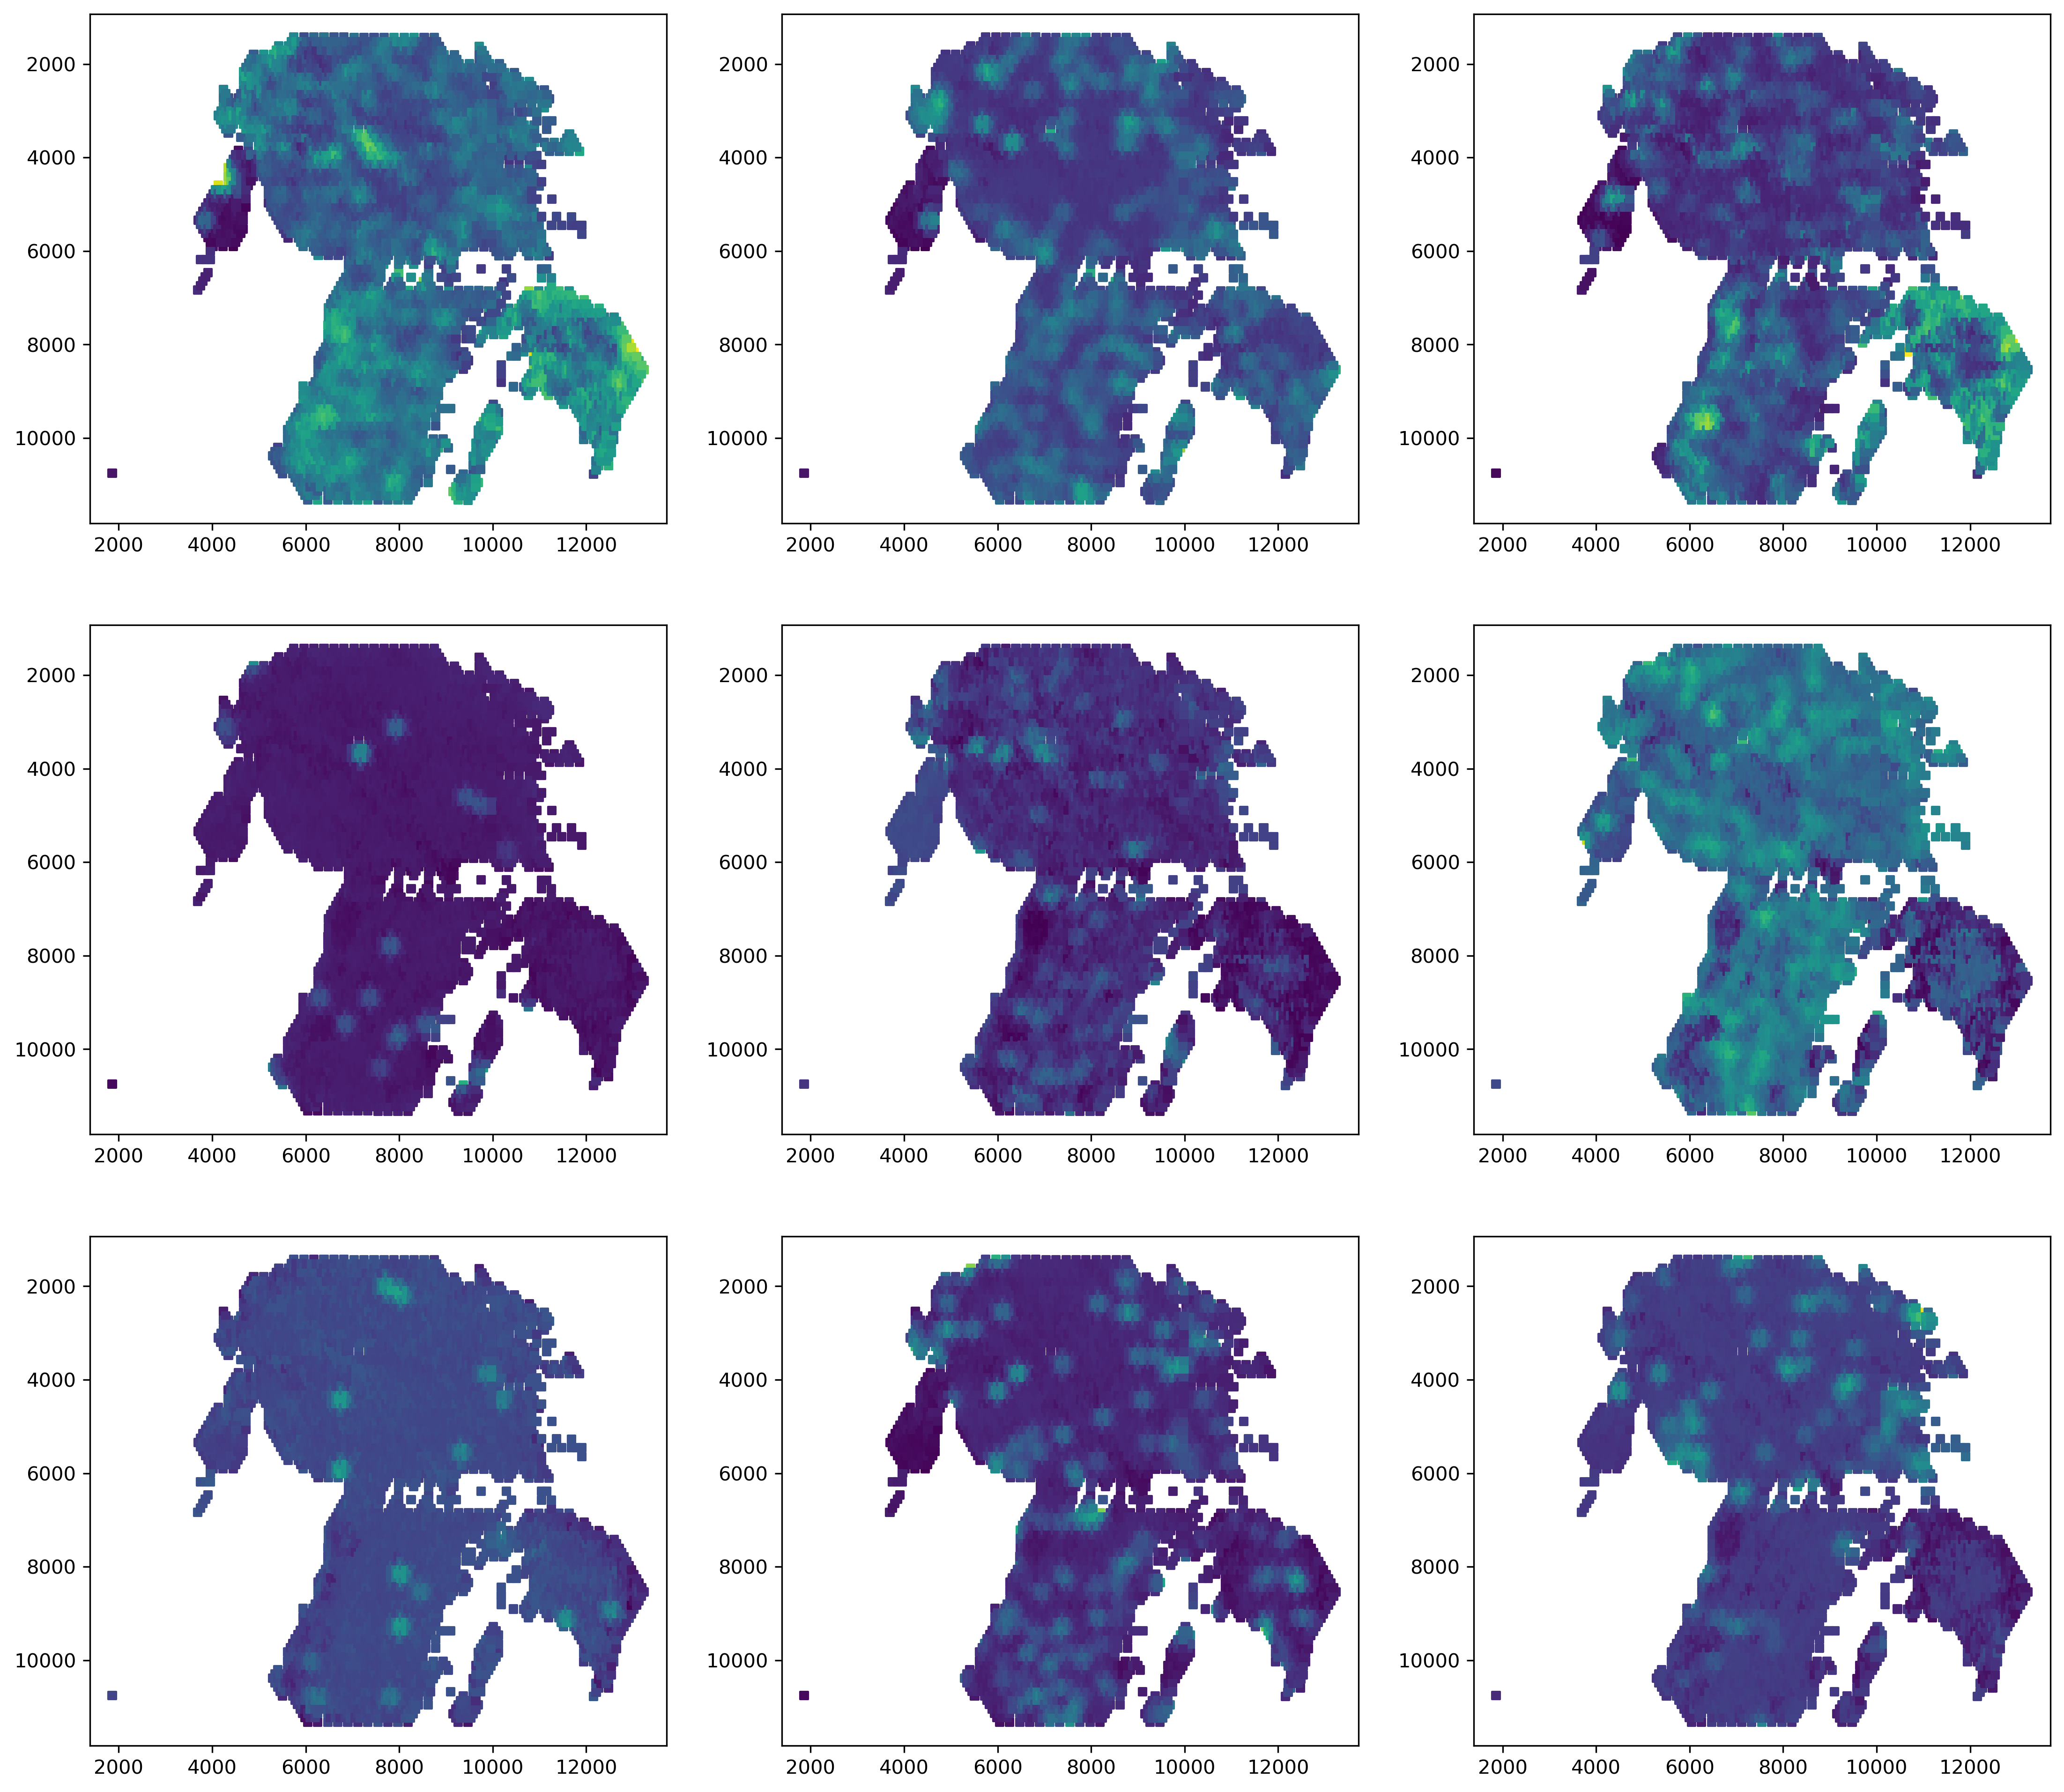

In [8]:
plt.figure(figsize=(18,16))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.scatter(adata_impt_all.obsm['spatial'][:,0], adata_impt_all.obsm['spatial'][:,1], marker = 's', c=adata_impt_all.X[:,i], cmap="viridis", s=15)
    plt.axis('equal')
    plt.gca().invert_yaxis()
    #pl.plt_util('Pattern {} - {} LR pairs'.format(i, df.query('pattern == @i').shape[0], ))
    plt.gcf().set_dpi(300)
# plt.savefig('mel_DE_clusters_spot.pdf')

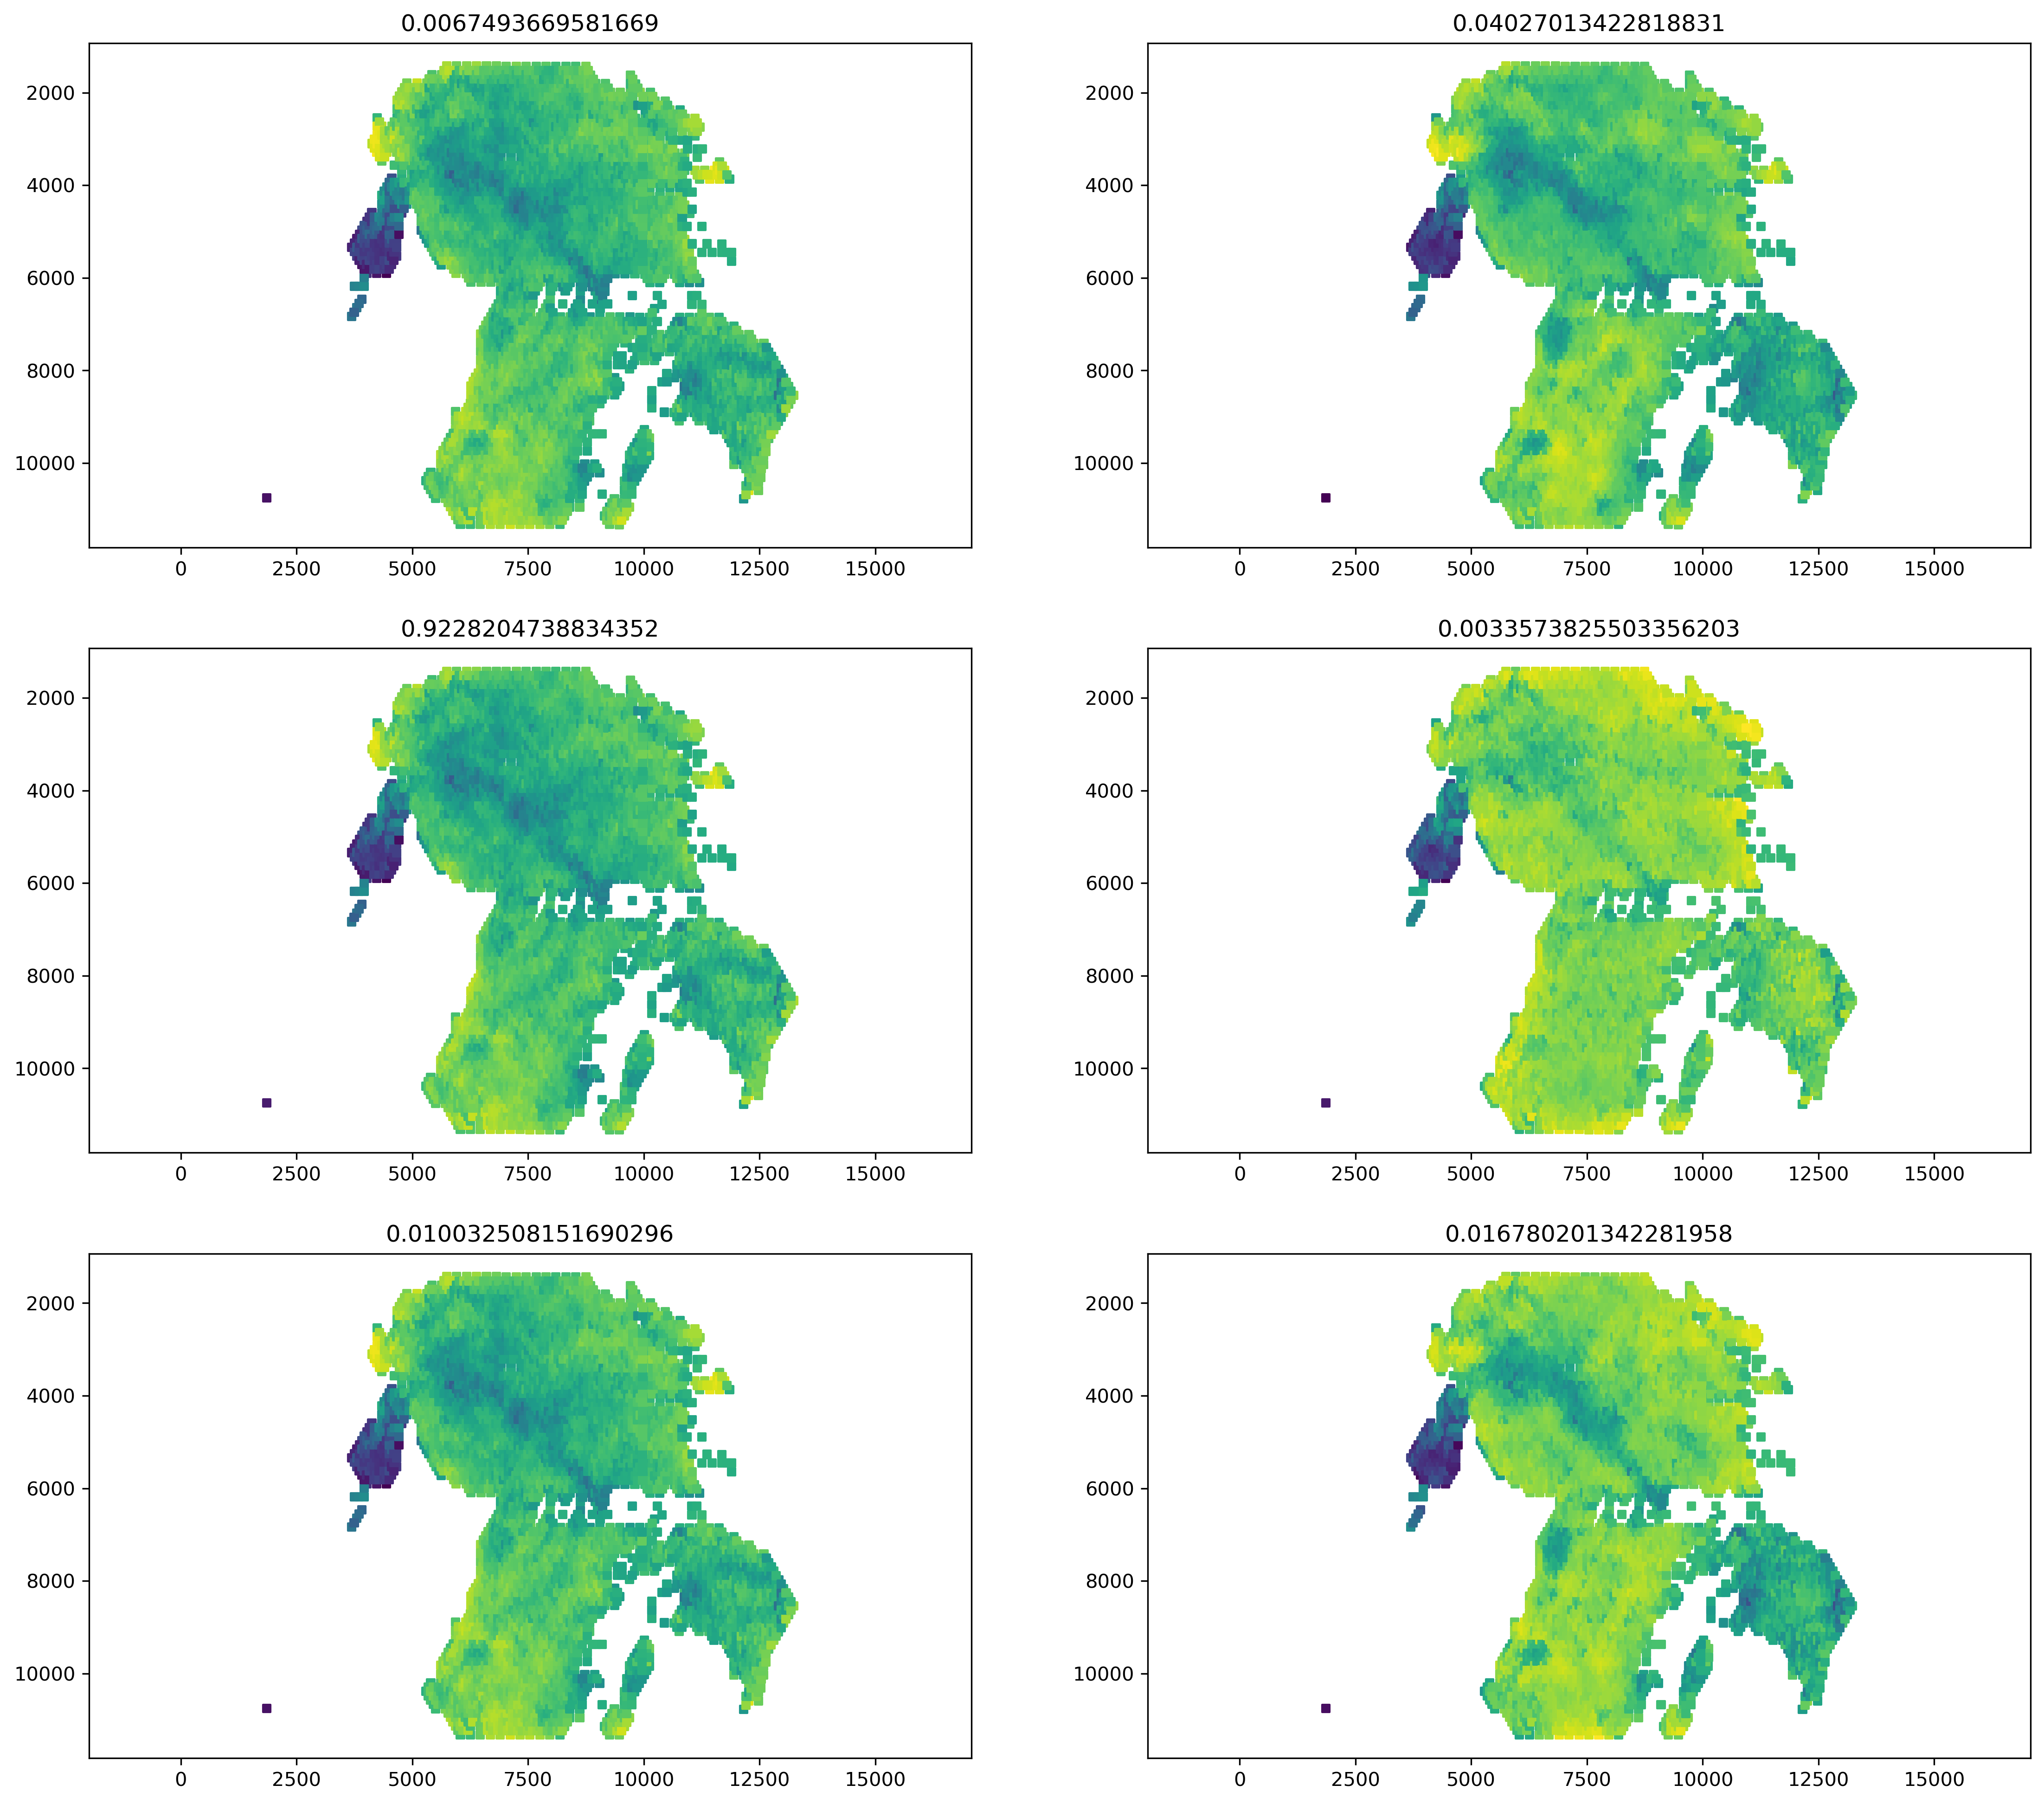

In [10]:
plot_clusters(gaussian_0,label='proportion')

# NPC1-ligand receptor pair

In [7]:
spot_diameter_fullres = 127.8358082731091
l = spot_diameter_fullres
cutoff = 0.001

single_cell = False
n_nearest_neighbors = 6 
n_neighbors = None, 
n_neighbors = n_nearest_neighbors * 31

l = spot_diameter_fullres
cutoff = 0.001 
n_neighbors=None  
n_nearest_neighbors=6
single_cell=False


## large neighborhood for W (5 layers)
from sklearn.neighbors import NearestNeighbors
def _Euclidean_to_RBF(X, l, singlecell=single_cell):
    """Convert Euclidean distance to RBF distance"""
    from scipy.sparse import issparse
    if issparse:
        rbf_d = X
        rbf_d[X.nonzero()] = np.exp(-X[X.nonzero()].A**2 / (2 * l ** 2))
    else:
        rbf_d = np.exp(- X**2 / (2 * l ** 2))
    # At single-cell resolution, no within-spot communications
    if singlecell:
        np.fill_diagonal(rbf_d, 0)
    else:
        rbf_d.setdiag(np.exp(-X.diagonal()**2 / (2 * l ** 2)))
    return rbf_d


adata_impt_all.uns['single_cell'] = single_cell
if isinstance(adata_impt_all.obsm['spatial'], pd.DataFrame):
    X_loc = adata_impt_all.obsm['spatial'].values
else:
    X_loc = adata_impt_all.obsm['spatial']

if n_neighbors is None:
    n_neighbors = n_nearest_neighbors * 31


## large neighborhood for W (5 layers)
nnbrs = NearestNeighbors(
    n_neighbors=n_neighbors,
    algorithm='ball_tree', 
    metric='euclidean'
).fit(X_loc)
nbr_d = nnbrs.kneighbors_graph(X_loc, mode='distance')
rbf_d = _Euclidean_to_RBF(nbr_d, l, single_cell)


## small neighborhood for RBF
nnbrs0 = NearestNeighbors(
    n_neighbors=n_nearest_neighbors, 
    algorithm='ball_tree', 
    metric='euclidean'
).fit(X_loc)
nbr_d0 = nnbrs0.kneighbors_graph(X_loc, mode='distance')
rbf_d0 = _Euclidean_to_RBF(nbr_d0, l, single_cell)


# NOTE: add more info about cutoff, n_neighbors and n_nearest_neighbors
if cutoff:
    # not efficient -- 原来的code
    # rbf_d[rbf_d < cutoff] = 0
    
    # more efficient: 
    # https://seanlaw.github.io/2019/02/27/set-values-in-sparse-matrix/
    nonzero_mask = np.array(rbf_d[rbf_d.nonzero()] < cutoff)[0]
    rows = rbf_d.nonzero()[0][nonzero_mask]
    cols = rbf_d.nonzero()[1][nonzero_mask]
    rbf_d[rows, cols] = 0

# elif n_neighbors:
#     nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(rbf_d)
#     knn = nbrs.kneighbors_graph(rbf_d).toarray()
#     rbf_d = rbf_d * knn

adata_impt_all.obsp['weight'] = rbf_d * adata_impt_all.shape[0] / rbf_d.sum()
adata_impt_all.obsp['nearest_neighbors'] = rbf_d0 * adata_impt_all.shape[0] / rbf_d0.sum()

In [ ]:
sdm.extract_lr(adata_impt_all, 'human', min_cell=3)      # find overlapping LRs from CellChatDB
print(adata_impt_all)

AnnData object with n_obs × n_vars = 5039 × 596
    obs: 'x', 'y'
    uns: 'geneInter', 'local_stat', 'local_z', 'local_z_p', 'selected_spots', 'single_cell', 'mean', 'ligand', 'receptor', 'num_pairs'
    obsm: 'spatial'
    obsp: 'nearest_neighbors', 'weight'


In [9]:
sdm.spatialdm_global(adata_impt_all, n_perm=1000, specified_ind=None, method='z-score', nproc=1)     # global Moran selection
sdm.sig_pairs(adata_impt_all, method='z-score', fdr=True, threshold=0.1)     # select significant pairs

In [10]:
adata_impt_all.raw = adata_impt_all

import time
start = time.time()
sdm.spatialdm_local(adata_impt_all, n_perm=1000, method='z-score', specified_ind=None, nproc=1)     # local spot selection
sdm.sig_spots(adata_impt_all, method='z-score', fdr=False, threshold=0.1)     # significant local spots
print("%.3f seconds" %(time.time()-start))

3.094 seconds


In [11]:
print(adata_impt_all)
# 由 z score 得到的 P 值
adata_impt_all.uns["local_z_p"]

AnnData object with n_obs × n_vars = 5039 × 596
    obs: 'x', 'y'
    uns: 'geneInter', 'local_stat', 'local_z', 'local_z_p', 'selected_spots', 'single_cell', 'mean', 'ligand', 'receptor', 'num_pairs', 'global_I', 'global_stat', 'global_res'
    obsm: 'spatial'
    obsp: 'nearest_neighbors', 'weight'


0         1         2         3         4         5  \
EFNA5_EPHB2  0.812734  1.000000  1.000000  1.000000  1.000000  0.889804   
EFNB1_EPHA4  1.000000  0.475286  0.999987  0.461302  0.468892  0.512731   
EFNB1_EPHB1  1.000000  0.697025  0.408778  0.451858  0.676784  0.638709   
EFNB1_EPHB2  1.000000  0.585721  1.000000  0.460501  0.689316  0.039573   
EFNB1_EPHB3  1.000000  0.600598  1.000000  0.587939  0.925723  0.579293   
...               ...       ...       ...       ...       ...       ...   
CCL3_CCR5    1.000000  1.000000  1.000000  1.000000  0.738358  0.581517   
CCL5_CCR5    1.000000  0.679945  1.000000  1.000000  0.916419  0.563568   
CCL4_CCR5    1.000000  1.000000  1.000000  1.000000  0.925827  0.606581   
CXCL1_ACKR1  0.538190  1.000000  0.295192  0.647770  1.000000  0.482652   
CORT_SSTR2   1.000000  1.000000  1.000000  0.750473  0.663453  0.631588   

                    6         7         8         9  ...      5029      5030  \
EFNA5_EPHB2  1.000000  1.000000  1.000000  1.000000  ...  0.358390  1.000000   
EFNB1_EPHA4  0.750120  0.960887  1.000000  1.000000  ...  1.000000  0.553294   
EFNB1_EPHB1  0.553805  1.000000  1.000000  0.641895  ...  1.000000  0.520049   
EFNB1_EPHB2  1.000000  1.000000  1.000000  1.000000  ...  0.529120  0.480523   
EFNB1_EPHB3  0.579617  1.000000  1.000000  1.000000  ...  0.525378  0.484624   
...               ...       ...       ...       ...  ...       ...       ...   
CCL3_CCR5    1.000000  0.554348  0.970124  1.000000  ...  0.032998  0.555073   
CCL5_CCR5    0.521150  0.511465  0.023366  0.537434  ...  0.437113  0.713286   
CCL4_CCR5    1.000000  0.468196  0.000412  0.590434  ...  0.264310  0.668238   
CXCL1_ACKR1  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
CORT_SSTR2   0.332404  1.000000  0.588205  1.000000  ...  1.000000  1.000000   

                 5031      5032      5033      5034      5035      5036  \
EFNA5_EPHB2  1.000000  0.612942  0.604228  1.000000  0.504169  0.586477   
EFNB1_EPHA4  0.588101  0.535898  0.231551  0.405988  0.570580  0.565335   
EFNB1_EPHB1  0.752744  0.301209  0.117563  0.308463  0.149040  0.402738   
EFNB1_EPHB2  1.000000  0.431892  0.236407  0.521786  0.492014  0.401582   
EFNB1_EPHB3  1.000000  0.553284  0.681660  0.525871  0.314680  0.380428   
...               ...       ...       ...       ...       ...       ...   
CCL3_CCR5    0.570042  0.613510  0.512416  0.517058  1.000000  1.000000   
CCL5_CCR5    0.811502  0.779320  0.445735  0.486822  0.554086  1.000000   
CCL4_CCR5    0.844387  0.927276  0.359887  0.452005  0.551847  1.000000   
CXCL1_ACKR1  0.495441  1.000000  1.000000  1.000000  1.000000  1.000000   
CORT_SSTR2   1.000000  0.549938  0.736143  0.780080  0.499802  0.020597   

                 5037      5038  
EFNA5_EPHB2  0.494672  1.000000  
EFNB1_EPHA4  0.596308  0.628285  
EFNB1_EPHB1  0.158178  0.021182  
EFNB1_EPHB2  0.510983  0.664289  
EFNB1_EPHB3  0.799997  0.650086  
...               ...       ...  
CCL3_CCR5    0.490398  1.000000  
CCL5_CCR5    1.000000  1.000000  
CCL4_CCR5    1.000000  0.485147  
CXCL1_ACKR1  1.000000  1.000000  
CORT_SSTR2   0.682380  0.648617  

[786 rows x 5039 columns]

In [12]:
bin_spots = (1-adata_impt_all.uns["local_z_p"])[adata_impt_all.uns['local_stat']['n_spots']>2]
Y = bin_spots.to_numpy()

In [14]:
gaussian_1 = MixedGaussian(adata_impt_all.obsm['spatial'],group_size=16,d=30,l=1e-5)
cluster_1 = gaussian_1.run_cluster(Y.T,3,iter=50) 

/mnt/jackywang/nfs_share/anaconda3/envs/biotransfer/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0
updating variance
Iteration 1


In [18]:
plot_clusters(gaussian_1)

0:updating cond_cov
1:updating cond_cov
updating variance
2:updating cond_cov
3:updating cond_cov
4:updating cond_cov


# Visium HD - genes

In [16]:
from FineST.utils import *        
from FineST.datasets import dataset

#adata_impt_all = dataset.CRC_FineST()
adata_impt_all = dataset.CRC_Original()
adata_impt_all.obsm['spatial'] = np.column_stack((np.array(adata_impt_all.obs['array_row']), np.array(adata_impt_all.obs['array_col'])))
print(adata_impt_all)

AnnData object with n_obs × n_vars = 136954 × 862
    obs: 'array_row', 'array_col'
    obsm: 'spatial'


In [17]:
gaussian_2 = MixedGaussian(adata_impt_all.obsm['spatial'],group_size=16,d=30,l=1e-5)
cluster_2 = gaussian_2.run_cluster(adata_impt_all.X.toarray(),3,iter=50) 

KeyboardInterrupt: 

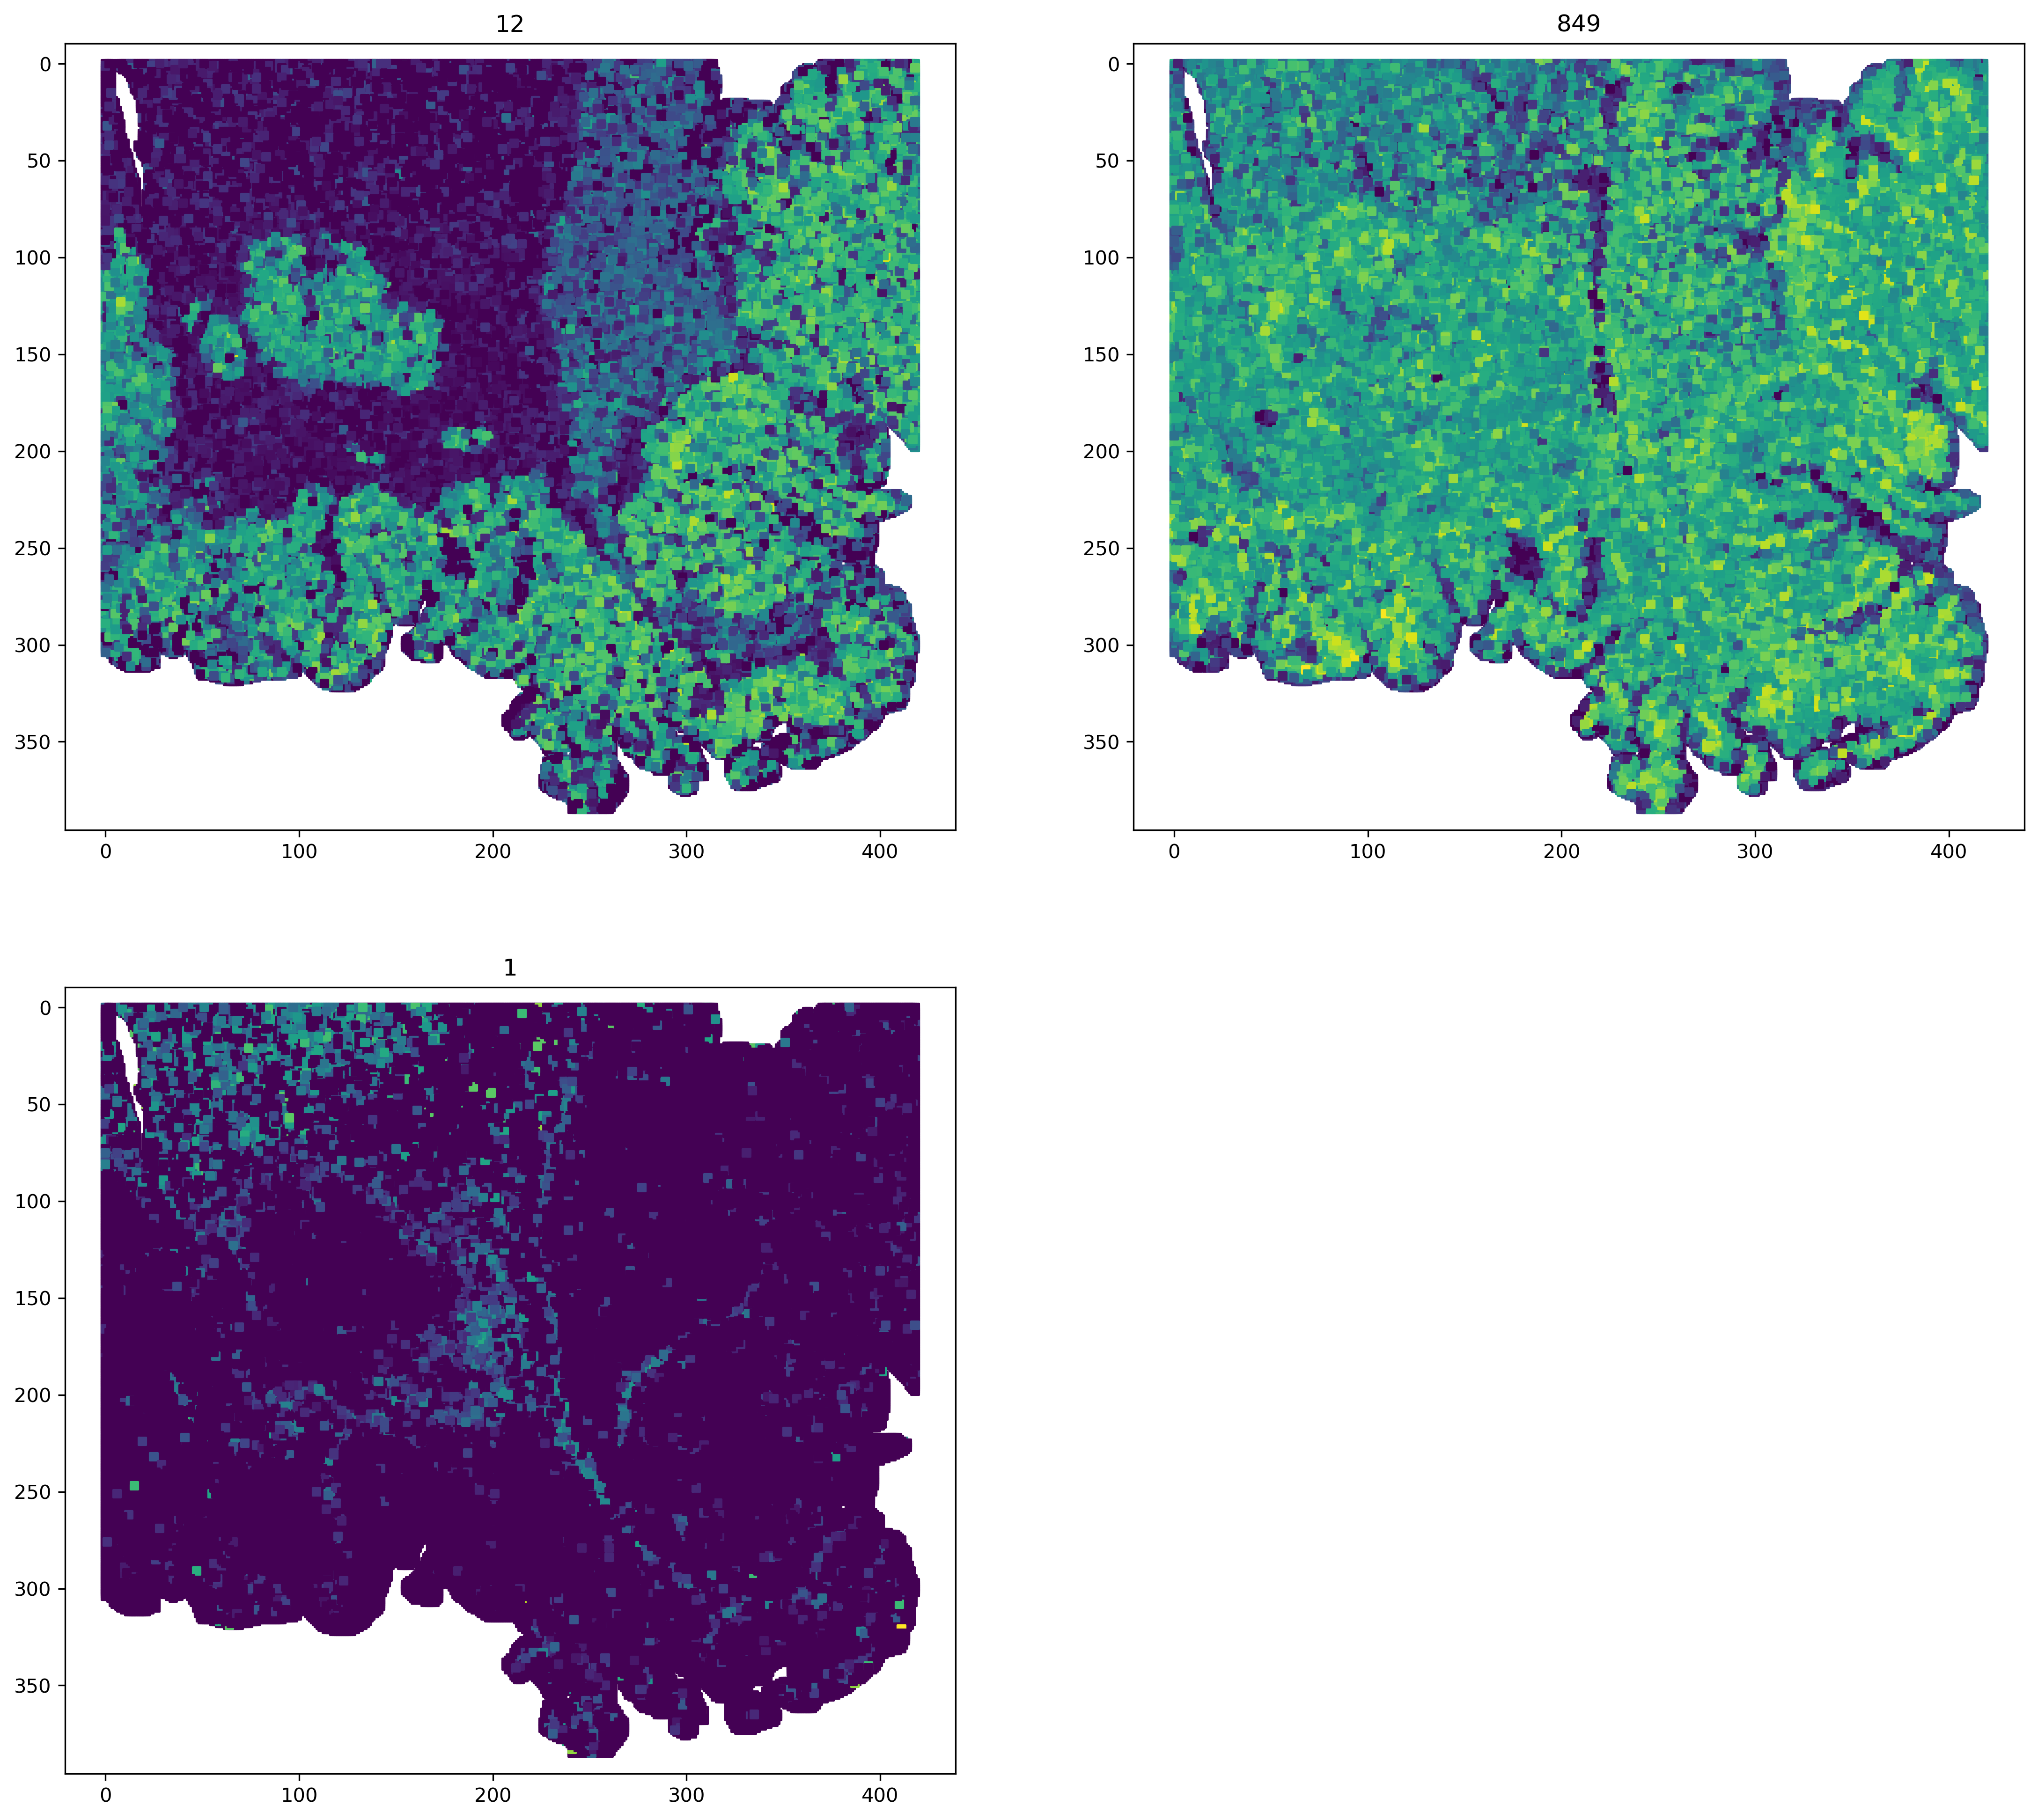

In [13]:
plot_clusters(gaussian_2)